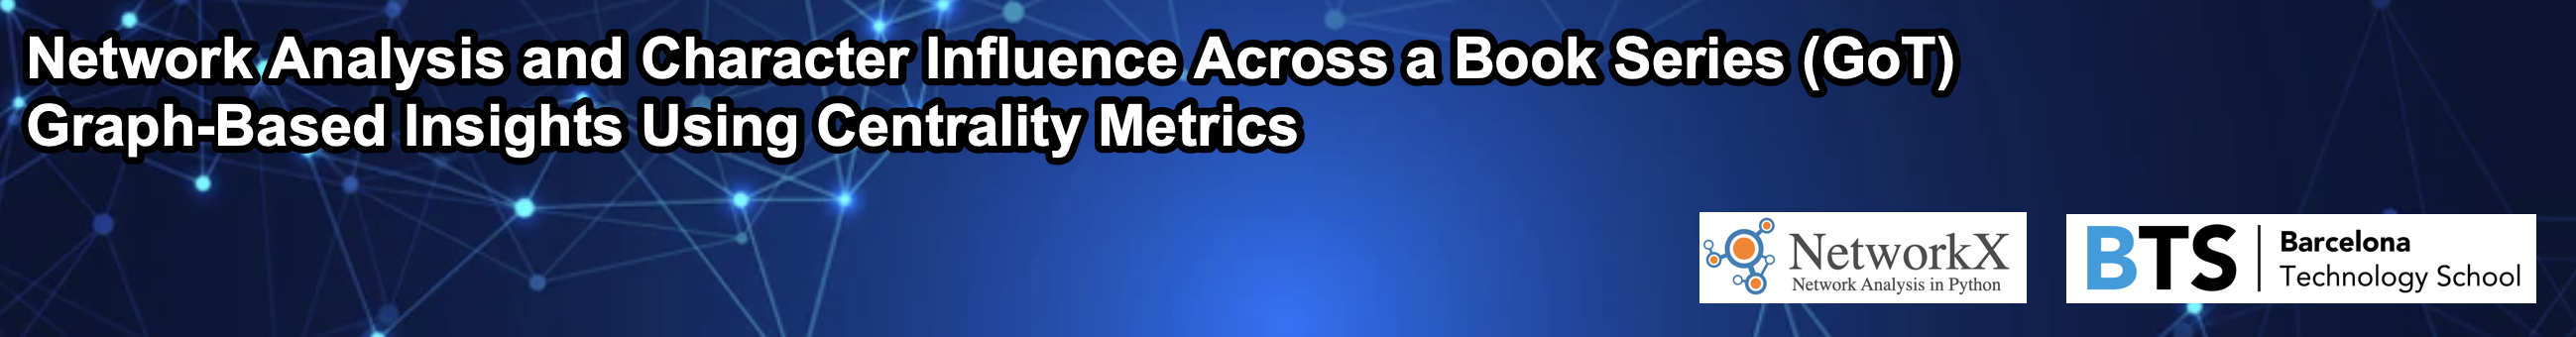

#### 1. Import libraries

In [889]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

#### 2. Parameters

In [892]:
characters = ["Jon-Snow", "Daenerys-Targaryen", "Tyrion-Lannister", "Sansa-Stark", "Jorah-Mormont"]
folder_path = 'books'

#### 3. Read Data

In [895]:
#All files in folder
file_names = os.listdir(folder_path)
file_names

['book1.csv', 'book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']

In [897]:
def load_and_merge_books(folder_path, file_names):
    data_frames = []
    for file in file_names:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

In [899]:
# Whole dataframe
all_books_df = load_and_merge_books(folder_path, file_names)
all_books_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0
...,...,...,...,...,...
3904,Tyrion-Lannister,Ysilla,undirected,11,5.0
3905,Tywin-Lannister,Wylis-Manderly,undirected,3,5.0
3906,Victarion-Greyjoy,Wulfe,undirected,3,5.0
3907,Walder-Frey-(son-of-Jammos),Walder-Frey-(son-of-Merrett),undirected,10,5.0


#### 4. Character Relevance Calculation

In [902]:
# Create empty dictionary
character_relevance = {name: [] for name in characters}
character_relevance

{'Jon-Snow': [],
 'Daenerys-Targaryen': [],
 'Tyrion-Lannister': [],
 'Sansa-Stark': [],
 'Jorah-Mormont': []}

In [904]:
def calculate_relevance(df, characters):
    graph = nx.from_pandas_edgelist(df, 'Source', 'Target', edge_attr='weight')
    print(graph)
    
    # Calculate the weighted degree centrality of the nodes
    centrality = nx.degree_centrality(graph)
    
    relevance_scores = {}
    for name in characters:
        relevance_scores[name] = centrality.get(name, 0)
    
    # Return the relevance scores as a dictionary
    return relevance_scores

In [906]:
# Process each file
for file_name in file_names:
    print(file_name)
    book_df = pd.read_csv(file_name)
    
    # Calculate relevance for the current book
    relevance = calculate_relevance(book_df, characters)
    print(relevance)

    # Sort the characters by relevance scores in descending order
    relevance_list = list(relevance.items())  # Convert dictionary to a list of tuples
    ranked_relevance = sorted(relevance_list, key=lambda pair: pair[1], reverse=True)  # Sort by the second element (score)

    # Assign scores (5 for most relevant, 1 for least relevant)
    scores = {}
    for rank in range(len(ranked_relevance)):
        character = ranked_relevance[rank][0]  # Get the character name
        scores[character] = 5 - rank

    # Append scores to the character_relevance dictionary
    for char in characters:
        character_relevance[char].append(scores.get(char, 0))

book1.csv
Graph with 187 nodes and 684 edges
{'Jon-Snow': 0.19892473118279572, 'Daenerys-Targaryen': 0.11290322580645162, 'Tyrion-Lannister': 0.24731182795698928, 'Sansa-Stark': 0.18817204301075272, 'Jorah-Mormont': 0.06989247311827958}
book2.csv
Graph with 259 nodes and 775 edges
{'Jon-Snow': 0.10852713178294573, 'Daenerys-Targaryen': 0.06976744186046512, 'Tyrion-Lannister': 0.2054263565891473, 'Sansa-Stark': 0.10465116279069767, 'Jorah-Mormont': 0.03875968992248062}
book3.csv
Graph with 303 nodes and 1008 edges
{'Jon-Snow': 0.17218543046357615, 'Daenerys-Targaryen': 0.07947019867549669, 'Tyrion-Lannister': 0.19536423841059603, 'Sansa-Stark': 0.15894039735099338, 'Jorah-Mormont': 0.039735099337748346}
book4.csv
Graph with 274 nodes and 682 edges
{'Jon-Snow': 0.040293040293040296, 'Daenerys-Targaryen': 0, 'Tyrion-Lannister': 0.09523809523809523, 'Sansa-Stark': 0.0879120879120879, 'Jorah-Mormont': 0}
book5.csv
Graph with 317 nodes and 760 edges
{'Jon-Snow': 0.1962025316455696, 'Daenerys

In [908]:
character_relevance

{'Jon-Snow': [4, 4, 4, 3, 5],
 'Daenerys-Targaryen': [2, 2, 2, 2, 4],
 'Tyrion-Lannister': [5, 5, 5, 5, 3],
 'Sansa-Stark': [3, 3, 3, 4, 1],
 'Jorah-Mormont': [1, 1, 1, 1, 2]}

#### Data Visualization

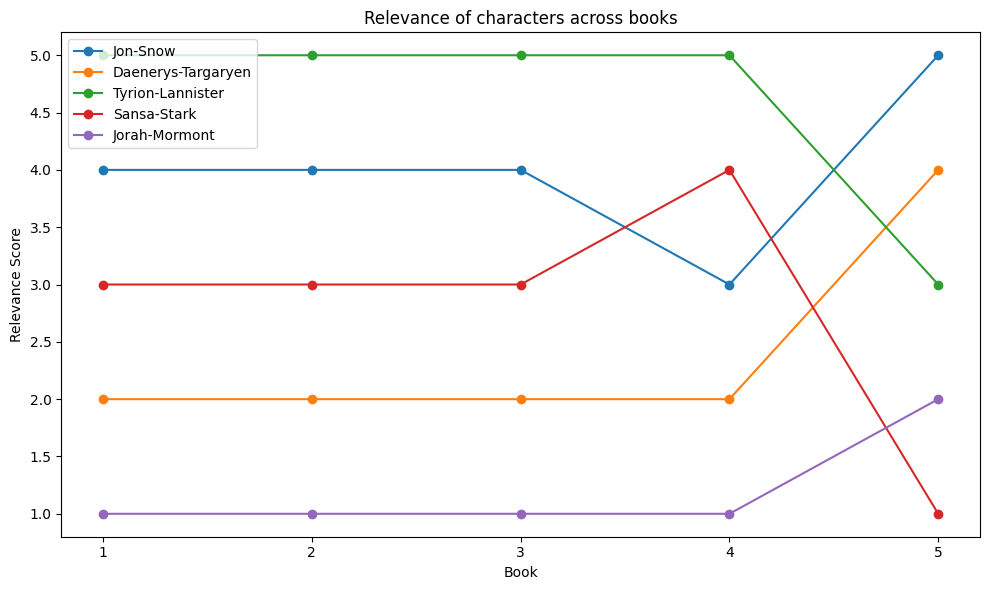

In [911]:
# Step 3: Plot the relevance evolution
plt.figure(figsize=(10, 6))

for char, scores in character_relevance.items():
    plt.plot(range(1, 6), scores, marker='o', label=char)

plt.title("Relevance of characters across books")
plt.xlabel("Book")
plt.ylabel("Relevance Score")
plt.xticks(range(1, 6))
plt.legend()
plt.tight_layout()
plt.show()